https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

## Sigmoid

In [34]:
import numpy as np
import matplotlib.pyplot as pl

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(757)

0.9999999979388463

In [15]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [16]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [14]:
digits.data.shape

(1797, 64)

In [15]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [19]:
import pandas as pd

df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


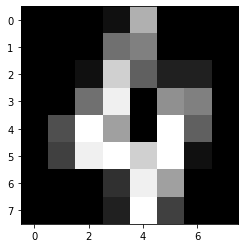

In [37]:
cuatro = df.iloc[4]
k = np.reshape(cuatro[:64].values, (8,8))
plt.imshow(k, cmap=plt.cm.gray)

In [38]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#y = a + b1X1 + b2X2 + b... + b64*X64

In [40]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

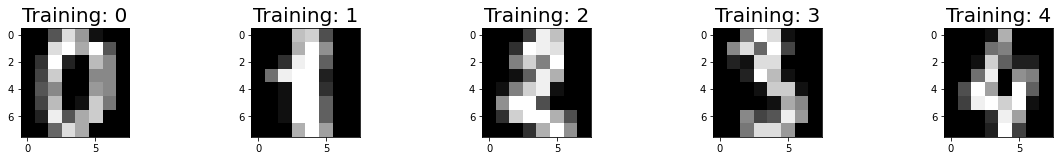

In [41]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.15, random_state=0)

In [71]:
x_train.shape

(1527, 64)

In [72]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [73]:
print(y_train[:5])

[3 6 4 6 3]


### To predict

In [74]:
logisticRegr.predict(x_train[:5])

array([3, 6, 4, 6, 3])

In [75]:
x_train[:5].shape

(5, 64)

In [76]:
x_test.shape

(270, 64)

In [77]:
y_test[:5]

array([2, 8, 2, 6, 6])

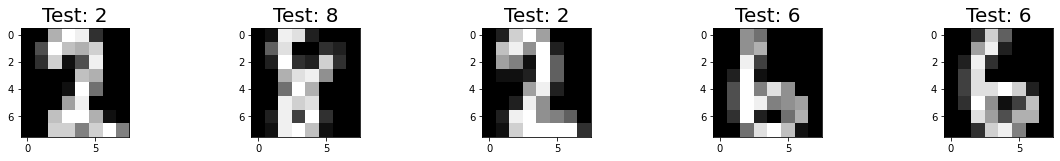

In [78]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Test: ' + str(label), fontsize = 20)

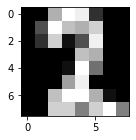

In [79]:
plt.rcParams['figure.figsize'] = 20 , 2
first_test_image = x_test[0]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

In [80]:
x_test[0].shape

(64,)

In [81]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1, -1))

array([2])

In [82]:
max(logisticRegr.predict_proba(x_test[0].reshape(1, -1))[0])

0.9999999992803712

In [83]:
y_test[0:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [84]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Probabilities

In [85]:
x_test[:1].shape

(1, 64)

In [86]:
logisticRegr.predict_proba(x_test[:1])

array([[3.16344884e-15, 1.98067992e-14, 9.99999999e-01, 6.25132228e-10,
        3.54579439e-18, 2.83904596e-12, 7.30834010e-19, 9.14285405e-11,
        2.05462369e-13, 8.35001797e-16]])

In [87]:
sum(logisticRegr.predict_proba(x_test[0:1])[0])

1.0000000000000004

In [88]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
max(logisticRegr.predict_proba(x_test[0:1])[0])

0.9999999992803712

### Measuring Model Performance (Digits Dataset)

In [90]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_train, y_train)
score

1.0

In [91]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

97.03703703703704 %


In [92]:
x_test.shape

(270, 64)

In [ ]:
10 / 1 
1000 / 10


### Matriz de confusión

Eje horizontal: falso negativo

Eje vertical: falso positivo

In [68]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

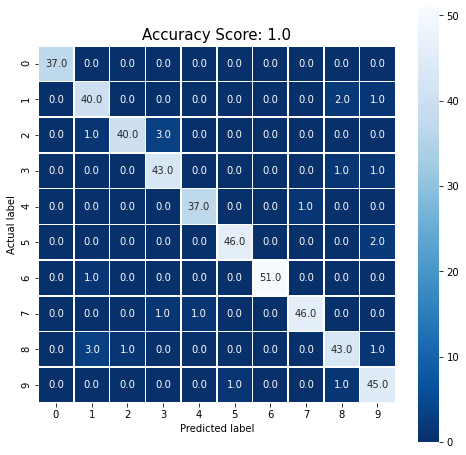

In [69]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [104]:
df2 = pd.DataFrame(data=digits['data'])
df2.shape

(1797, 64)

In [109]:
y = df[64]
y

0       0.0
1       1.0
2       2.0
3       3.0
4       4.0
       ... 
1792    9.0
1793    0.0
1794    8.0
1795    9.0
1796    8.0
Name: 64, Length: 1797, dtype: float64

In [116]:
y.values.reshape(-1, 1).shape

(1797, 1)

In [120]:
y_pred.shape

(1797,)

In [122]:
digits.target.shape

(1797,)

In [125]:
# Yo ya estoy contento con mi modelo:

# Ahora entreno el modelo con todos los datos que tengo
# Entreno el modelo con todos los datos
logisticRegr.fit(df2, y.values)

# Predecimos con todos los datos que tenemos
y_pred = logisticRegr.predict(df2)
# Calculamos cuánto de bien ha entrenado con nuestros datos
logisticRegr.score(df2, y.values)

1.0